<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Goals-&amp;-Methodology" data-toc-modified-id="Goals-&amp;-Methodology-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goals &amp; Methodology</a></span></li><li><span><a href="#Data-and-Variable-Explanation" data-toc-modified-id="Data-and-Variable-Explanation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data and Variable Explanation</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Reading-&amp;-Cleaning-data" data-toc-modified-id="Reading-&amp;-Cleaning-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading &amp; Cleaning data</a></span></li><li><span><a href="#Variable-Analysis" data-toc-modified-id="Variable-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variable Analysis</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Regression-Model" data-toc-modified-id="Baseline-Regression-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline Regression Model</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Improved-Model" data-toc-modified-id="Improved-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Improved Model</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion-and-Outlook" data-toc-modified-id="Conclusion-and-Outlook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion and Outlook</a></span></li></ul></div>

# Introduction
State notebook purpose here.

## Goals & Methodology
State the goals of the analysis and how it should be done.

## Data and Variable Explanation
Explain the datasets used and the relevant variables.

## Imports
Import libraries and write settings here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

The data cleaning function takes a few minutes to complete.

In [1]:
%run chrisDataCleanFunction.ipynb


time taken to run the function: 157.3311107158661
103.47465085983276


We get the following DFs:

- `salesNew`
- `salesOld`
- `salesNew_nStrata`
- `salesNew_strata`
- `salesNew_total`
- `salesOld_nStrata`
- `salesOld_strata`
- `salesOld_total`
- `rentNew`
- `rentOld`

# Analysis

## Reading & Cleaning data
Read in the pre-processed unstacked dataframe.

In [3]:
# reading in
master = pd.read_csv("Files/Cleaned/Postcode-based/Master_Sales_Rent_2017Q4_2021Q1_pcFeatures.csv")
master.head()

,postcode,skey,time_period,year,quarter,dwelling_type,median_price,mean_price,sales_no,Qdelta_median,...,citizen_non_AU,YARRP <1975,YARRP 1976-1995,YARRP 1996-2005,YARRP 2006-2016,ATSI,2yBonds%,10yBonds%,constr_index,Rate
0,2000,s122,2017 Q3,2017,Q3,Total,1350.0,1516.328059,135.0,0.1345,...,14662.0,525.0,1590.0,2175.0,13023.0,53.0,1.814167,2.646667,112.0,1.5
1,2000,s122,2017 Q3,2017,Q3,Strata,1350.0,1516.328059,135.0,0.1431,...,14662.0,525.0,1590.0,2175.0,13023.0,53.0,1.814167,2.646667,112.0,1.5
2,2007,s122,2017 Q3,2017,Q3,Total,817.5,804.448333,36.0,-0.1090,...,5033.0,109.0,479.0,593.0,4517.0,58.0,1.814167,2.646667,112.0,1.5
3,2007,s122,2017 Q3,2017,Q3,Strata,817.5,804.448333,36.0,-0.0815,...,5033.0,109.0,479.0,593.0,4517.0,58.0,1.814167,2.646667,112.0,1.5
4,2008,s122,2017 Q3,2017,Q3,Total,995.0,1061.807024,41.0,-0.0005,...,5962.0,155.0,541.0,607.0,5527.0,77.0,1.814167,2.646667,112.0,1.5


In [9]:
master.columns

Index(['postcode', 'skey', 'time_period', 'year', 'quarter', 'dwelling_type',
       'median_price', 'mean_price', 'sales_no', 'Qdelta_median',
       'Adelta_median', 'Qdelta_count', 'Adelta_count', 'rkey',
       'median_rent_newb', 'new_bonds_no', 'total_bonds_no',
       'Qdelta_median_rent', 'Qdelta_new_bonds', 'Adelta_median_rent',
       'Adelta_new_bonds', 'INCP_LOW', 'INCP_MID', 'INCP_HIGH', 'INCP_NEG_NIL',
       'CPRF_2', 'CPRF_3', 'CPRF_4', 'CPRF_5', 'CPRF_6+', 'CPRF_na',
       'CPRF_HHOLD_NO', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo',
       '55-64yo', '65+yo', 'population_2016', 'citizen_AU', 'citizen_non_AU',
       'YARRP <1975', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016',
       'ATSI', '2yBonds%', '10yBonds%', 'constr_index', 'Rate'],
      dtype='object')

## Variable Analysis

### Univariate Analysis
Analyse the relevant variables with regards to their distribution, development, outliers, missing values, etc.

### Bivariate Analysis
Analyse possible relationships between target variable and features. Check if features are correlated.

In [5]:
# pivot unstacked df to get aggregate values by postcode
pivot_postcode = pd.pivot_table(master,
                                index="postcode")
pivot_postcode

,0-4yo,10yBonds%,15-24yo,25-34yo,2yBonds%,35-54yo,5-14yo,55-64yo,65+yo,ATSI,...,citizen_non_AU,constr_index,mean_price,median_price,median_rent_newb,new_bonds_no,population_2016,sales_no,total_bonds_no,year
postcode,,,,,,,,,,,,,,,,,,,,,
2000,698.0,1.849917,5831.0,10676.0,1.223708,6298.0,552.0,1670.0,1692.0,53.0,...,14662.0,115.102500,1564.466403,1297.950000,677.250000,1142.775000,27411.0,97.975000,7935.475000,2018.825000
2007,198.0,1.750952,3441.0,2850.0,1.116905,1470.0,174.0,333.0,380.0,58.0,...,5033.0,115.274286,715.225619,736.600000,521.714286,313.200000,8846.0,21.514286,2000.914286,2018.942857
2008,208.0,1.781061,4584.0,4028.0,1.150739,1862.0,196.0,470.0,370.0,77.0,...,5962.0,115.175000,977.728209,865.404545,530.340909,779.477273,11712.0,23.227273,4610.818182,2018.886364
2009,606.0,1.772479,1431.0,4086.0,1.147500,3716.0,586.0,1227.0,1150.0,125.0,...,4142.0,115.120513,1220.281109,1003.730769,698.525641,343.461538,12813.0,36.076923,2931.538462,2018.846154
2010,689.0,1.802444,2608.0,9925.0,1.170722,8944.0,661.0,2435.0,2465.0,235.0,...,6773.0,115.153333,1485.020434,1298.266667,609.200000,924.400000,27733.0,98.800000,8340.333333,2018.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,25.0,1.998333,45.0,21.0,0.978333,104.0,71.0,72.0,72.0,22.0,...,3.0,115.150000,791.000000,766.875000,450.000000,5.000000,421.0,5.000000,5.000000,2019.000000
2877,324.0,1.802444,452.0,481.0,1.170722,854.0,559.0,513.0,712.0,846.0,...,91.0,115.153333,440.143333,426.283333,263.000000,18.000000,3880.0,13.000000,190.200000,2018.866667
2878,23.0,1.414167,34.0,55.0,0.790000,114.0,34.0,52.0,54.0,49.0,...,5.0,115.825000,753.437500,734.687500,450.000000,5.000000,371.0,5.000000,20.000000,2019.250000


In [10]:
pivot_postcode.columns

Index(['0-4yo', '10yBonds%', '15-24yo', '25-34yo', '2yBonds%', '35-54yo',
       '5-14yo', '55-64yo', '65+yo', 'ATSI', 'Adelta_count', 'Adelta_median',
       'Adelta_median_rent', 'Adelta_new_bonds', 'CPRF_2', 'CPRF_3', 'CPRF_4',
       'CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH',
       'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'Qdelta_count', 'Qdelta_median',
       'Qdelta_median_rent', 'Qdelta_new_bonds', 'Rate', 'YARRP 1976-1995',
       'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU',
       'citizen_non_AU', 'constr_index', 'mean_price', 'median_price',
       'median_rent_newb', 'new_bonds_no', 'population_2016', 'sales_no',
       'total_bonds_no', 'year'],
      dtype='object')

In [13]:
pivot_postcode[['mean_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo', '55-64yo', '65+yo', 'ATSI', 'CPRF_2', 'CPRF_3', 'CPRF_4','CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH', 'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU', 'citizen_non_AU']]



,mean_price,median_rent_newb,new_bonds_no,total_bonds_no,0-4yo,5-14yo,15-24yo,25-34yo,35-54yo,55-64yo,...,INCP_HIGH,INCP_LOW,INCP_MID,INCP_NEG_NIL,YARRP 1976-1995,YARRP 1996-2005,YARRP 2006-2016,YARRP <1975,citizen_AU,citizen_non_AU
postcode,,,,,,,,,,,,,,,,,,,,,
2000,1564.466403,677.250000,1142.775000,7935.475000,698.0,552.0,5831.0,10676.0,6298.0,1670.0,...,3929,9307,5319,3501,1590.0,2175.0,13023.0,525.0,8691.0,14662.0
2007,715.225619,521.714286,313.200000,2000.914286,198.0,174.0,3441.0,2850.0,1470.0,333.0,...,718,2803,1458,2410,479.0,593.0,4517.0,109.0,2726.0,5033.0
2008,977.728209,530.340909,779.477273,4610.818182,208.0,196.0,4584.0,4028.0,1862.0,470.0,...,1352,3321,2496,2779,541.0,607.0,5527.0,155.0,4358.0,5962.0
2009,1220.281109,698.525641,343.461538,2931.538462,606.0,586.0,1431.0,4086.0,3716.0,1227.0,...,3205,2896,3232,1040,1201.0,1097.0,3730.0,430.0,7407.0,4142.0
2010,1485.020434,609.200000,924.400000,8340.333333,689.0,661.0,2608.0,9925.0,8944.0,2435.0,...,7142,6385,7429,1303,2203.0,1784.0,6278.0,1030.0,16751.0,6773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,791.000000,450.000000,5.000000,5.000000,25.0,71.0,45.0,21.0,104.0,72.0,...,17,157,54,37,0.0,0.0,3.0,0.0,356.0,3.0
2877,440.143333,263.000000,18.000000,190.200000,324.0,559.0,452.0,481.0,854.0,513.0,...,192,1514,708,202,19.0,8.0,69.0,27.0,3414.0,91.0
2878,753.437500,450.000000,5.000000,20.000000,23.0,34.0,34.0,55.0,114.0,52.0,...,26,79,65,22,4.0,3.0,0.0,0.0,247.0,5.0


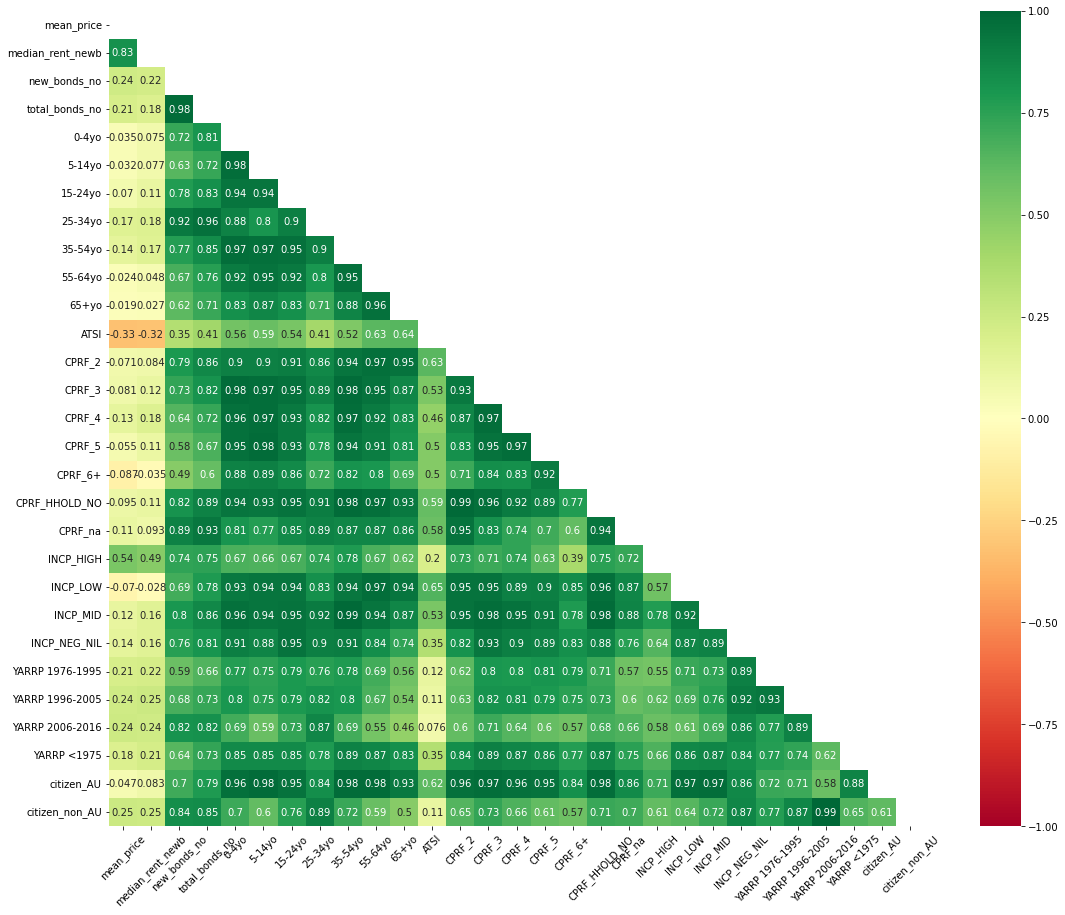

In [14]:
# show correlation
plt.figure(figsize=(20, 15))

postcode_corr = pivot_postcode[['mean_price', 'median_rent_newb', 'new_bonds_no', 'total_bonds_no', '0-4yo', '5-14yo', '15-24yo', '25-34yo', '35-54yo', '55-64yo', '65+yo', 'ATSI', 'CPRF_2', 'CPRF_3', 'CPRF_4','CPRF_5', 'CPRF_6+', 'CPRF_HHOLD_NO', 'CPRF_na', 'INCP_HIGH', 'INCP_LOW', 'INCP_MID', 'INCP_NEG_NIL', 'YARRP 1976-1995', 'YARRP 1996-2005', 'YARRP 2006-2016', 'YARRP <1975', 'citizen_AU', 'citizen_non_AU']]

matrix = np.triu(postcode_corr.corr())

sns.heatmap(postcode_corr.corr(), 
            annot=True, # put coefficients in
            fmt='.2g', # set number of decimals
            vmin=-1, vmax=1, center=0, # rescale colorbar
            cmap='RdYlGn', # set color palette
            square=True, # set squares
            mask=matrix) # display only lower triangular matrix
plt.yticks(rotation=360)
plt.xticks(rotation=45);

Analysis of correlation with price:
- There is a very strong positive relationship between the __rent level__ and the sales price level. This implies that postcodes that have high rent prices also tend to have high sales prices. It remains unknown, however, if there actually is a causal relationship.
- There is a positive relationship with the amount of __new bonds__. This would make intuitively sense if the number of new bonds is seen as a proxy for demand in an area. First and foremost, this should have an effect on rent levels, but since rent prices are heavily correlated with sales levels, it would make sense if there is some relation with this too.
- The number of people in a certain __age bracket__ seems to have a slight positive relationship with sales price for people aged between 25-54. Once could argue that this covers the typical working lifespan and hence people in this age bracket are expected to have more money which is reflected in sales prices.
- There is a moderately strong negative relationship with __ATSI__. This implies that prices levels are lower in postcode areas where more people identifying as aboriginal live.
- There is a moderate to strong positive relationship with __high income__. This implies that postcode area with high sales prices tend to have a population with higher income.
- There is a rather weak positive relationship with the __different years of arrival__ in Australia. At this point, however, it is hard to reason why there should be a relationship
- Lastly, there is rather weak positive relationship with __non Australian citizenship__. This implies that postcodes with higher sales prices are culturally more diverse with a larger proportion of non-Australian citizens.

In [7]:
# pivot unstacked df to get aggregate values by time period
pivot_time = pd.pivot_table(master,
                            index="time_period")
pivot_time

,0-4yo,10yBonds%,15-24yo,25-34yo,2yBonds%,35-54yo,5-14yo,55-64yo,65+yo,ATSI,...,constr_index,mean_price,median_price,median_rent_newb,new_bonds_no,population_2016,postcode,sales_no,total_bonds_no,year
time_period,,,,,,,,,,,,,,,,,,,,,
2017 Q3,949.302292,2.646667,1893.363181,2186.928367,1.814167,4028.681948,1870.289398,1788.164040,2444.792264,412.926934,...,112.0,881.040117,817.798515,468.486011,149.977762,15161.582378,2373.504298,47.223496,1592.468436,2017
2017 Q4,940.663812,2.643333,1880.937901,2174.952177,1.866667,3997.364026,1853.124911,1777.055675,2433.186296,409.760885,...,112.5,912.937545,850.072091,470.278542,142.995711,15057.276945,2378.672377,44.374019,1470.077913,2017
2018 Q1,956.077770,2.776667,1909.472487,2208.561262,1.976667,4058.569332,1881.542920,1805.970653,2476.910492,415.263390,...,112.9,863.320983,816.213866,472.084446,159.922230,15297.066031,2373.030081,36.843727,1512.078503,2018
2018 Q2,962.785245,2.743333,1922.726808,2222.950329,2.050000,4090.111030,1897.127100,1815.025566,2485.410519,417.528123,...,114.2,857.570124,796.760774,471.677283,153.766253,15396.138057,2370.439737,38.682980,1540.567568,2018
2018 Q3,966.580451,2.620000,1928.712030,2234.334586,2.016667,4103.945865,1901.045865,1824.423308,2509.241353,420.318797,...,114.6,817.623308,759.679699,470.146376,167.330075,15468.212782,2371.206015,29.440602,1576.686466,2018
2018 Q4,954.798387,2.596667,1907.991202,2212.280059,1.996667,4055.846041,1878.004399,1800.642962,2469.667155,414.839443,...,115.1,848.209677,787.079912,467.485337,156.173754,15279.221408,2373.824780,35.145894,1570.950147,2018
2019 Q1,980.955371,2.120000,1960.025719,2264.162632,1.726667,4165.496974,1932.476551,1849.976551,2534.949319,423.555976,...,115.3,807.459153,753.301059,475.130106,174.481846,15688.163389,2366.751135,28.220121,1620.857791,2019
2019 Q2,970.722883,1.630000,1942.586924,2245.878158,1.233333,4127.618128,1912.867013,1832.043834,2508.736999,419.251114,...,115.8,875.753343,791.147103,470.155275,159.605498,15540.496285,2369.656761,36.976969,1630.115156,2019
2019 Q3,963.489408,1.096667,1925.472608,2224.981008,0.820000,4093.101534,1898.048210,1816.474799,2484.789627,416.441198,...,115.8,908.508400,821.303871,466.598247,176.550037,15406.472608,2369.368882,39.820307,1618.223521,2019


Interesting features to analyse over time together with price:
- dwelling type (in first EDA notebook)
- sales number
- median rent
- new bonds
- bond yields
- construction costs
- interest rate

# Modeling

## Baseline Regression Model
Create a first baseline model here.

## Feature Engineering
Improve baseline model with different combinations and/or transformation of variables.

## Improved Model
Test if baseline model can be improved by using more sophisticated algorithms.

# Results


# Conclusion and Outlook
Summarise findings and elaborate on implications and scope of model with regards to data sufficiency.